<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE30338](https://jckantor.github.io/CBE30338)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE30338.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

## SIR Modell für Omicron

### Einführung in das SIR Modell

Das SIR Modell ist ein sog. "compartment model" und geht auf die Forscher Kermick und McKendrick aus dem Jahre 1927 zurück. 

Im SIR Modell wird die Bevölkerung in drei Gruppen eingeteilt:

* **S-Gruppe (Susceptible)** Die Anzahl Personen, welche von einer ansteckendenden Krankheit angesteckt angesteckt werden kann.
* **I-Gruppe (Infectious)** Angesteckte Personen, die andere anstecken können
* **R-Gruppe (Recovered)** Immunisierte oder verstorbene Personen, die nicht mehr anstecken können


$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

Das Modell verwendet folgende Prozessraten:

* $\frac{\beta S I}{N}$ ist die Rate bei welcher Personen angesteckt werden können, wobei $S$ die Gruppe ist, die noch angesteckt werden können. $\beta$ hat die Einheit 1/(Personen*Tage). 
* $\gamma I$ ist die Rate mit welcher die infiszierten Personen aus der Gruppe gesunden und resistent gegen weitere Infektionen werden. $I$ ist die Grösse infektiösen Gruppe.

Das Modell für die Verbreitung des Omicron wird folgendem System von Differentialgleichungen beschrieben

\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

Um es allgemeingültig zu halten, werden die Personen der Gruppen S, I und R durch die Gesamtbevölkerung geteilt

\begin{align}
s = \frac{S}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 

Nach der Ersetzung ergibt sich folgendes System von vier Gleichungen:

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{di}{dt} & = \beta s i - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

wobei $s + i + r = 1$ das Total der Bevölkerung, also 100 Prozent ergibt.

### Wichtige Annahmen und Parameter

Das SIR Model beschreibt die Verbreitung von Epidemien anhand folgender Annahmen und Parameter.

* Der Parameter $\beta$ hat die Einheit 1 / Personentag
* Der Parameter d $\gamma$ hat die Einheit 1 / Tag
* $\beta$ ist Ansteckungsrate. Diese ist grösser, je mehr das Virus sich über Kontakte etc. verbreiten kann Die Verbreitung erfolgt exponentiell ( beispielsweise 1, 2, 4, 8, 16, 32, 64, 128, 256).  
* $\gamma$ ist die Gesundungsrate. Der Kehrwert $\tau_{recovery}=\frac{1}{\gamma}$ ist die Mittlere Zeit, bis die eine Person nicht mehr ansteckend ist.
* Die ansteckende Bevölkerung kann nur wachsen, solange $\beta s > \gamma$, d.h. dass die Ansteckungsrate grösser als die Gesundungsrate ist.
* Das Verhältnis $R_0 = \frac{\beta}{\gamma}$ ist the "Basisreproduktionszahl" welche die Anzahl Personen beschreibt, die durch eine infektiöse Person angesteckt werden können. 
* Demzufolge nimmt die infektiöse Population solange zu, als $R_0 s > 1$. Hier ist  $s$ der Anteil der ansteckbaren (susceptible) Personen
* Die infektiöse Population sinkt, sobald $s R_0 < 1$ oder wenn natürlich fast keine Personen mehr übrig sind, die angesteckt werden können, also $s < \frac{1}{R_0}$.
* Damit erreicht die Bevölkerung eine 'Herdenimmunität' sobald der Anteil der ansteckbaren kleiner ist als $\frac{1}{R_0}$.

### Simulation

Der folgenden Python Code berechnet eine Simulation des SIR Models. Die Annahmen können variieren und sind wie folgt gewählt

* $\tau_{infectious} = \frac{1}{\gamma} = 5$ Tage.
* $R_0 = \frac{\beta}{\gamma} = 3.4$ 
* $r = 0.3 $ entspricht 30 Prozent Anteil der immunen Bevölkerung am Anfang.

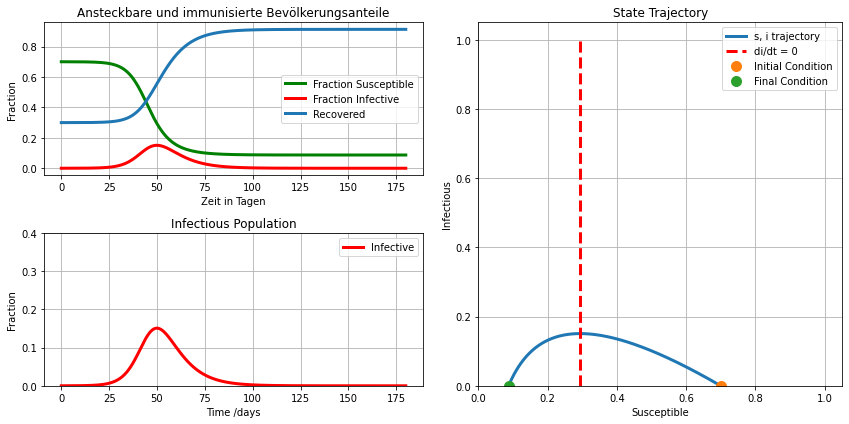

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 3.4
t_infective = 7

# initial number of infected and recovered individuals
i_initial = 1/20000
r_initial = 0.3
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]
# Zeitachse
t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, color='green', label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, color='red', label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Ansteckbare und immunisierte Bevölkerungsanteile')
    ax[0].set_xlabel('Zeit in Tagen')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, color='red', label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3,  label='Exposed')
    # Höhe der unteren Grafik
    ax[1].set_ylim(0, 0.4)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, color='red', label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

<!--NAVIGATION-->
< [Manometer Models and Dynamics](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/03.08-Manometer-Models-and-Dynamics.ipynb) | [Contents](toc.ipynb) | [PID Control](http://nbviewer.jupyter.org/github/jckantor/CBE30338/blob/master/notebooks/04.00-PID_Control.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/notebooks/03.09-COVID-19.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/CBE30338/master/notebooks/03.09-COVID-19.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>